## 热图(Heat map)

In [364]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset
# 新增
import seaborn as sns

### 简单例子


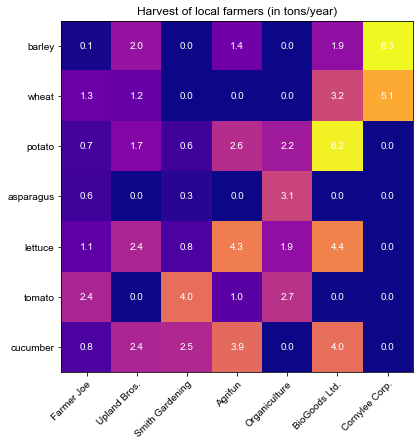

In [433]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

fig=plt.figure(figsize=(6,6))
ax=plt.gca()
interp=None
im = ax.imshow(harvest,cmap='plasma',interpolation=interp) #mitchell

ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
ax.set_ylim(-0.5,len(vegetables)-0.5)

plt.tight_layout(pad=0.)

fname_fig=str('../../figures/Chapter3/Lecture3_3_basic_%s.pdf'%(interp))
plt.savefig(fname_fig)
plt.show()

## 离散型分级色阶

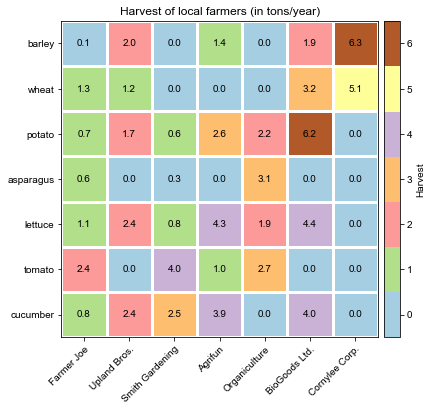

In [148]:
data=harvest
# 分级色阶
minlevel,maxlevel=int(np.min(data)),int(np.max(data))
nlevel=int(maxlevel-minlevel)+1
norm = matplotlib.colors.BoundaryNorm(np.linspace(minlevel-0.5,maxlevel+0.5, nlevel+1), nlevel) # 划重点
# plot
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
im = ax.imshow(harvest,cmap=plt.get_cmap("Paired", nlevel), norm=norm) #mitchell 
cbar_kw=dict(ticks=np.arange(minlevel,maxlevel+1))
ax_cb=ax.inset_axes([1.02,0,0.05,1],transform=ax.transAxes)
cbar = plt.colorbar(im, cax=ax_cb,label='Harvest',**cbar_kw)
# grid
ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)
# -------------------------------------------------------
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="k")

ax.set_title("Harvest of local farmers (in tons/year)")
ax.set_ylim(-0.5,len(vegetables)-0.5)

plt.tight_layout()

fname_fig='../../figures/Chapter3/Lecture3_3_basic2.pdf'
plt.savefig(fname_fig)

plt.show()

## 案例1

[Feng et al., 2020, Figure 1B](https://doi.org/10.1158/1078-0432.CCR-19-3997)

32 11 (32, 11)


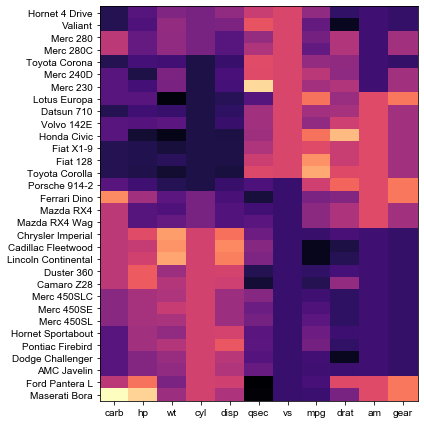

In [424]:
data_cars=pd.read_csv('Data/mtcars/mtcars.csv')
df = data_cars.set_index('model')
del df.index.name

clustermap=sns.clustermap(df, z_score=1,cmap='magma')  #dendrogram_row.linkage
clusterdata=clustermap.data2d
plt.close()

models=clusterdata.index
values=np.array(clusterdata.values,dtype=float)
# values_norm=values/values.max(axis=0)
names=clusterdata.columns.values
print(len(models),len(names),values.shape)


fig=plt.figure(figsize=(6,6))
ax=plt.gca()
x = np.arange(values.shape[1] + 1)
y = np.arange(values.shape[0] + 1)
# 第一种方式
# im = ax.imshow(values,cmap='magma',aspect='auto') #mitchell 
# 第二种方式
ax.pcolormesh(x,y,values,cmap='magma')

# set axes
ax.set_xlim(x.min(),x.max())
ax.set_xticks(x[:-1]+0.5)
ax.set_xticklabels(names)
ax.set_ylim(y.min(),y.max())
ax.set_yticks(y[:-1]+0.5)
ax.set_yticklabels(models)
ax.invert_yaxis()

plt.tight_layout()

fname_fig='../../figures/Chapter3/Lecture3_3_example1.pdf'
plt.savefig(fname_fig)

plt.show()

## 案例2

[Feng et al., 2020, Figure 1A](https://doi.org/10.1158/1078-0432.CCR-19-3997)

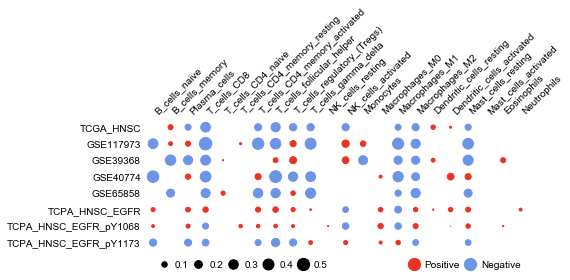

In [263]:
fname_TCGA='Data/190830_EGFR_immune cells/Spearman.csv'
fname_pvalue='Data/190830_EGFR_immune cells/P-value.csv'

data_TCGA=pd.read_csv(fname_TCGA)
header=data_TCGA.columns.values
names=data_TCGA[header[0]].values
cells=header[1:]
sValue=np.array(data_TCGA.values[:,1:],dtype=float)

data_pvalue=pd.read_csv(fname_pvalue)
pValue=np.array(data_pvalue.values[:,1:],dtype=float)

# plot
fig=plt.figure(figsize=(8,4))
ax=plt.gca()
y=np.linspace(1,len(names),len(names))
x=np.linspace(1,len(cells),len(cells))
xx,yy=np.meshgrid(x,y)
factor_markersize=300
marker_size=np.abs(sValue)*factor_markersize
ind_available=(sValue<0.002)
ind_large=(pValue>0.05) 
ind_large=(ind_large & ind_available)
ind_small=(pValue<=0.05) 
ind_small = (ind_small & ind_available)
color_positive=(236/255,51/255,35/255)
color_negative=(109/255,149/255,230/255)

ax.scatter(xx[ind_small],yy[ind_small],s=marker_size[ind_small],marker='o',color=color_negative)
ax.scatter(xx[ind_large],yy[ind_large],s=marker_size[ind_large],marker='o',color=color_positive)
# plot legend
ax.scatter(-10,-10,color=color_positive,s=factor_markersize*0.5,marker='o',label='Positive')
ax.scatter(-10,-10,color=color_negative,s=factor_markersize*0.5,marker='o',label='Negative')
leg1=ax.legend(ncol=2,columnspacing=0,handletextpad=0.1,frameon=False,bbox_to_anchor=(1,0))
ax.add_artist(leg1)
marksize_legend=[0.1,0.2,0.3,0.4,0.5]
art_list=[]
label_list=[]
for i in range(0,len(marksize_legend)):
    dot=ax.scatter(-1,-1,color='k',marker='o',s=factor_markersize*marksize_legend[i])
    art_list.append(dot)
    label_list.append(str('%.1f'% marksize_legend[i]))
leg2=ax.legend(art_list,label_list,ncol=5,columnspacing=0,handletextpad=0.1,frameon=False,bbox_to_anchor=(0.5,0))
# ---------------
ax.yaxis.set_ticks(y)
ax.yaxis.set_ticklabels(names)
ax.xaxis.set_ticks(x)
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_ticklabels(cells,ha='left',rotation=45)
ax.set_xlim(0.5,max(x)+0.5)
ax.set_ylim(max(y)+0.5,0.5)
# ax_legend.set_xlim(0.5,max(x)+0.5)
# ax_legend.set_ylim(0,1)
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
# 取消坐标轴但保留label
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

fname_fig='../../figures/Chapter3/Lecture3_3_example2.pdf'
plt.savefig(fname_fig)

plt.show()